In [1]:
# Importing Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Ingestion

In [2]:
df = pd.read_excel("/content/customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


#Data Preprocessing :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


Observation :

*   There are 9 columns or features . 8 independent features and 1 dependent feature .

*   Float : 1 columns , Integer : 5 columns , Object : 3 columns



In [4]:
# Checking missing values

df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Obsevation : There are no missing values .

In [5]:
df.shape

(100000, 9)

Observation : Total 1 lakh records and 9 columns .

In [6]:
# Statistics of the Dataset

df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


<Axes: >

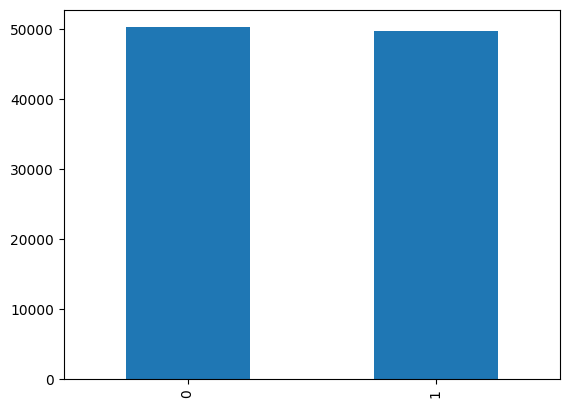

In [7]:
# Checking if the dataset is imbalaced or not

df['Churn'].value_counts().plot(kind='bar')

Obsevation : The dataset is Balanced  

<Figure size 800x400 with 0 Axes>

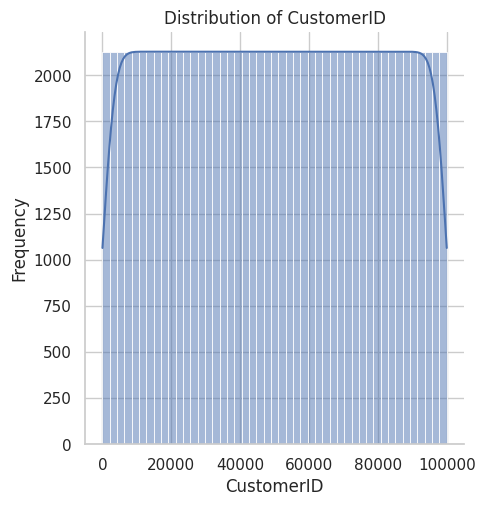

<Figure size 800x400 with 0 Axes>

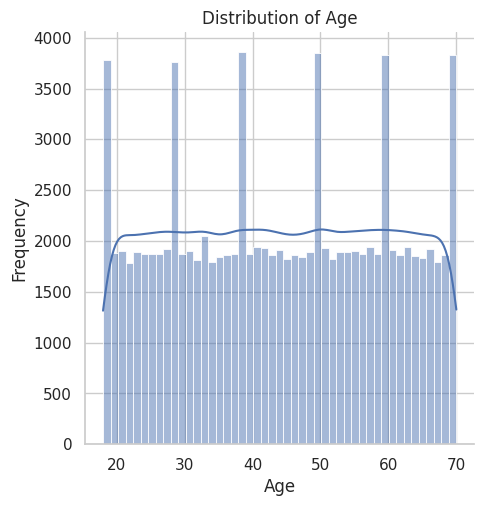

<Figure size 800x400 with 0 Axes>

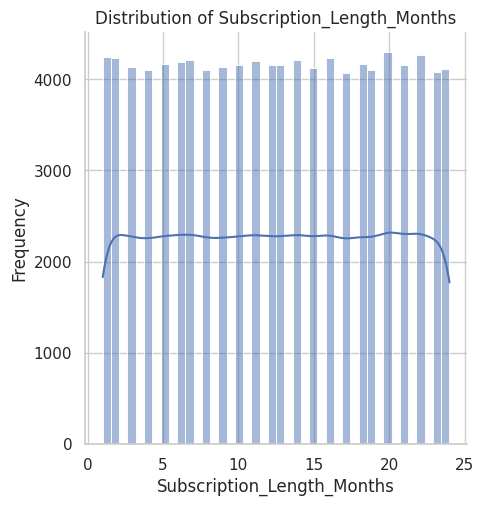

<Figure size 800x400 with 0 Axes>

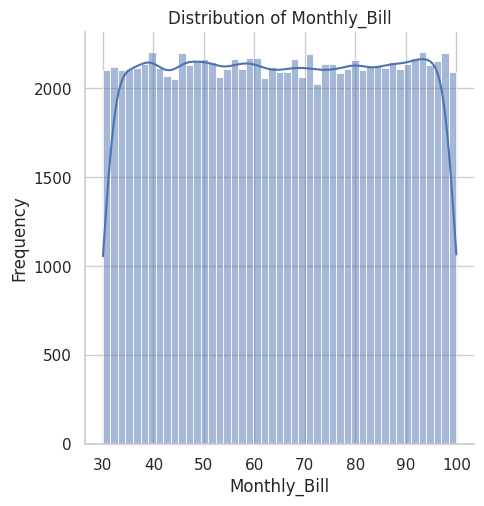

<Figure size 800x400 with 0 Axes>

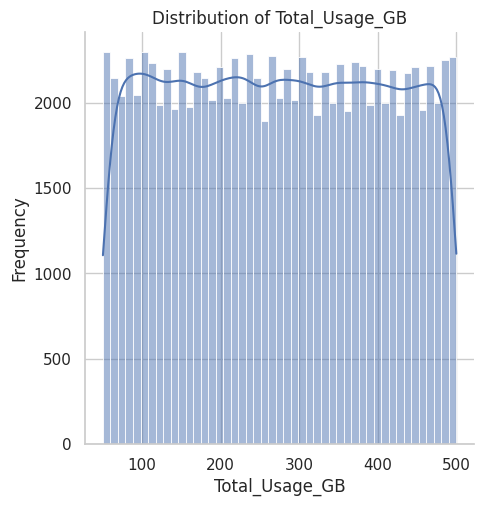

<Figure size 800x400 with 0 Axes>

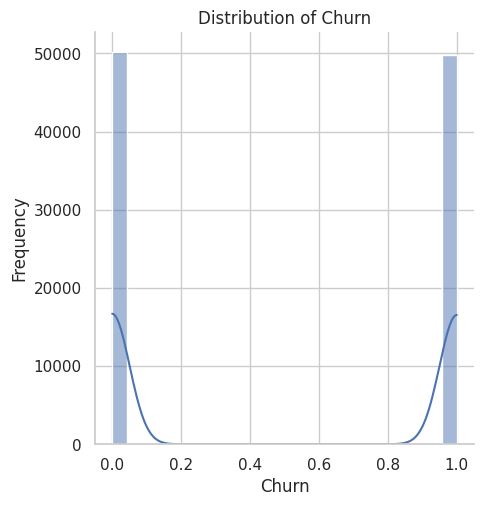

In [8]:
# Checking distribution of numerical columns


# Visualize the distribution of numerical columns
numerical_columns = df.select_dtypes(include='number')

# Set the style of the plots (you can customize it)
sns.set(style='whitegrid')

# Create subplots for each numerical column
for col in numerical_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.displot(data=numerical_columns, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

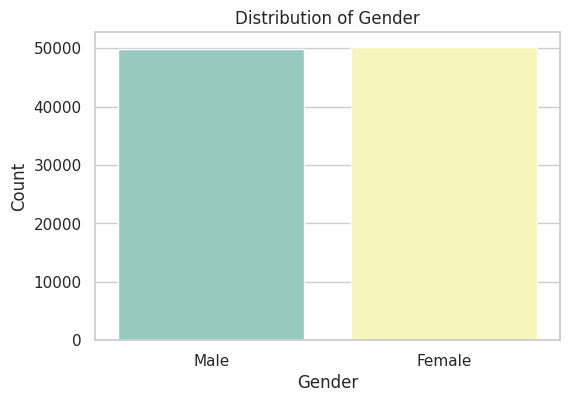

In [9]:
# Visualize the distribution of categorical columns
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=df['Gender'], palette="Set3")
plt.title(f'Distribution of {"Gender"}')
plt.xlabel("Gender")
plt.ylabel('Count')
plt.show()

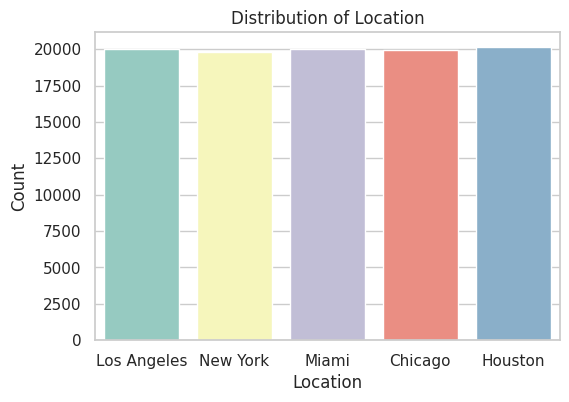

In [10]:
# Visualize the distribution of categorical columns
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=df['Location'], palette="Set3")
plt.title(f'Distribution of {"Location"}')
plt.xlabel("Location")
plt.ylabel('Count')
plt.show()

In [14]:
# Dropping unnessesary columns

df_copy = df.copy()
df_new = df_copy.drop(['CustomerID','Name'],axis=1)
df_new.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


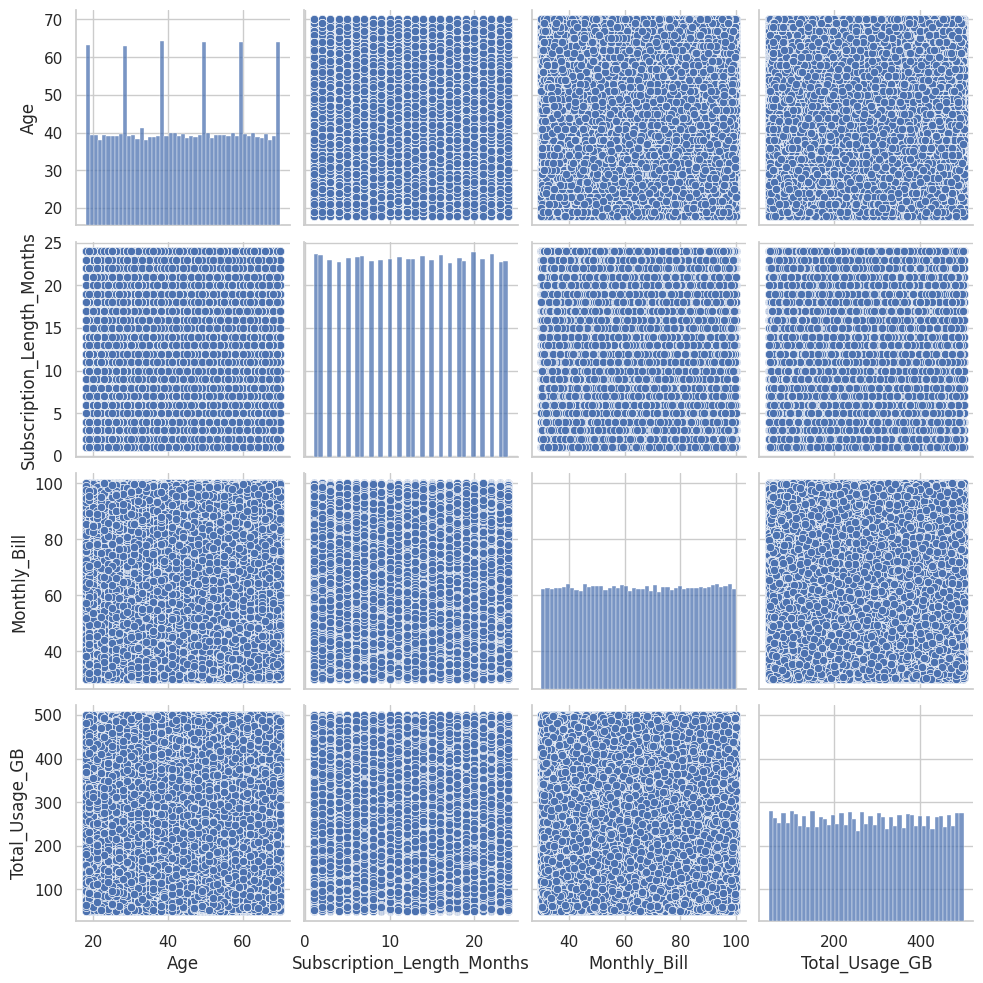

In [16]:
# Checking relations between input columns

sns.pairplot(df[['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']])

In [17]:
# Checking correlations between input features

df[['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']].corr()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
Age,1.000000,0.003382,0.001110,0.001927
Subscription_Length_Months,0.003382,1.000000,-0.005294,-0.002203
Monthly_Bill,0.001110,-0.005294,1.000000,0.003187
Total_Usage_GB,0.001927,-0.002203,0.003187,1.000000


In [23]:
# Encoding Categorical columns

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe.fit(df[['Gender','Location']])
one_hot_encoded = ohe.transform(df[['Gender','Location']])
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=ohe.get_feature_names_out(input_features=['Gender','Location']))
encoded_df = pd.concat([df_new, one_hot_df], axis=1)
encoded_df = encoded_df.drop(['Gender','Location'], axis=1)

In [25]:
encoded_df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,62,1,48.76,172,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,24,5,85.47,460,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,36,3,97.94,297,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,46,19,58.14,266,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

X = encoded_df.drop('Churn',axis=1)
y = encoded_df[['Churn']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)